In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load the cleaned sales data
file_path = 'updated_sales_data.csv'
sales_data = pd.read_csv(file_path)

sales_data.head(10)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,Amount,PurchasePrice,Profit
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,17.28,10.65,5.84
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,34.55,10.65,11.68
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,17.28,10.65,5.84
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,15.28,10.65,3.84
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,750.0,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY,70.77,27.34,15.30
5,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,750.0,1,34.99,34.99,2016-01-15,375,1,0.39,12546,JIM BEAM BRANDS COMPANY,35.38,27.34,7.65
6,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,750.0,1,34.99,34.99,2016-01-22,375,1,0.39,12546,JIM BEAM BRANDS COMPANY,35.38,27.34,7.65
7,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,750.0,1,34.99,34.99,2016-01-30,375,1,0.39,12546,JIM BEAM BRANDS COMPANY,35.38,27.34,7.65
8,1_HARDERSFIELD_10058,1,10058,F Coppola Dmd Ivry Cab Svgn,750.0,4,59.96,14.99,2016-01-05,750,2,0.45,2000,SOUTHERN WINE & SPIRITS NE,60.41,9.26,22.92
9,1_HARDERSFIELD_10058,1,10058,F Coppola Dmd Ivry Cab Svgn,750.0,1,14.99,14.99,2016-01-06,750,2,0.11,2000,SOUTHERN WINE & SPIRITS NE,15.10,9.26,5.73


In [3]:
# Check data types and column names
print(sales_data['PurchasePrice'].dtype)
print(sales_data['Profit'].dtype)
print(sales_data.columns)

# Set display options (to show all columns)
pd.set_option('display.max_columns', None)

# Display info and head
sales_data.info()
sales_data.head()

# If data types are incorrect, convert them:
sales_data['PurchasePrice'] = pd.to_numeric(sales_data['PurchasePrice'], errors='coerce')
sales_data['Profit'] = pd.to_numeric(sales_data['Profit'], errors='coerce')

# If column names have issues, rename them:
sales_data = sales_data.rename(columns={' PurchasePrice ': 'PurchasePrice', 'Profit ': 'Profit'})

float64
float64
Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName', 'Amount', 'PurchasePrice',
       'Profit'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  float64
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-nul

In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  float64
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
 14  Amount          1048575 non-null  float64
 15  PurchasePrice   1048575 non-null  float64
 16  Profit          1048575 non-null  fl

In [5]:
# Create MaxDailySales column
max_daily_sales = sales_data.groupby('SalesDate')['SalesQuantity'].max().reset_index()
max_daily_sales = max_daily_sales.rename(columns={'SalesQuantity': 'MaxDailySales'})
sales_data = pd.merge(sales_data, max_daily_sales, on='SalesDate', how='left')

In [6]:
# Impute missing values with 0
!pip install scikit-learn
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer  # Import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)
sales_data = pd.DataFrame(imputer.fit_transform(sales_data), columns=sales_data.columns) # Impute and update sales_data

# Convert relevant columns to numeric if necessary
numeric_cols = ['PurchasePrice', 'Profit', 'SalesQuantity', 'SalesPrice', 'ExciseTax', 'Size']
for col in numeric_cols:
    if col in sales_data.columns:
        sales_data[col] = pd.to_numeric(sales_data[col], errors='coerce')


Missing values in dataset:
 InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
Amount            0
PurchasePrice     0
Profit            0
MaxDailySales     0
dtype: int64


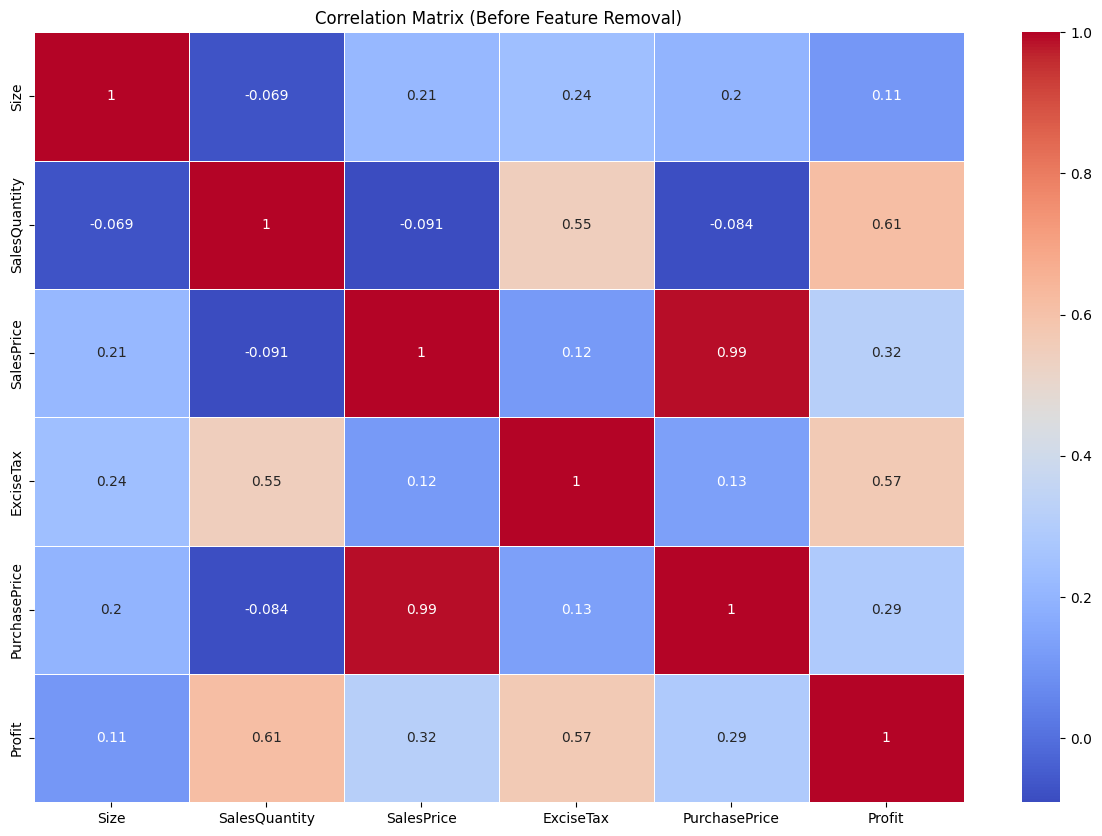

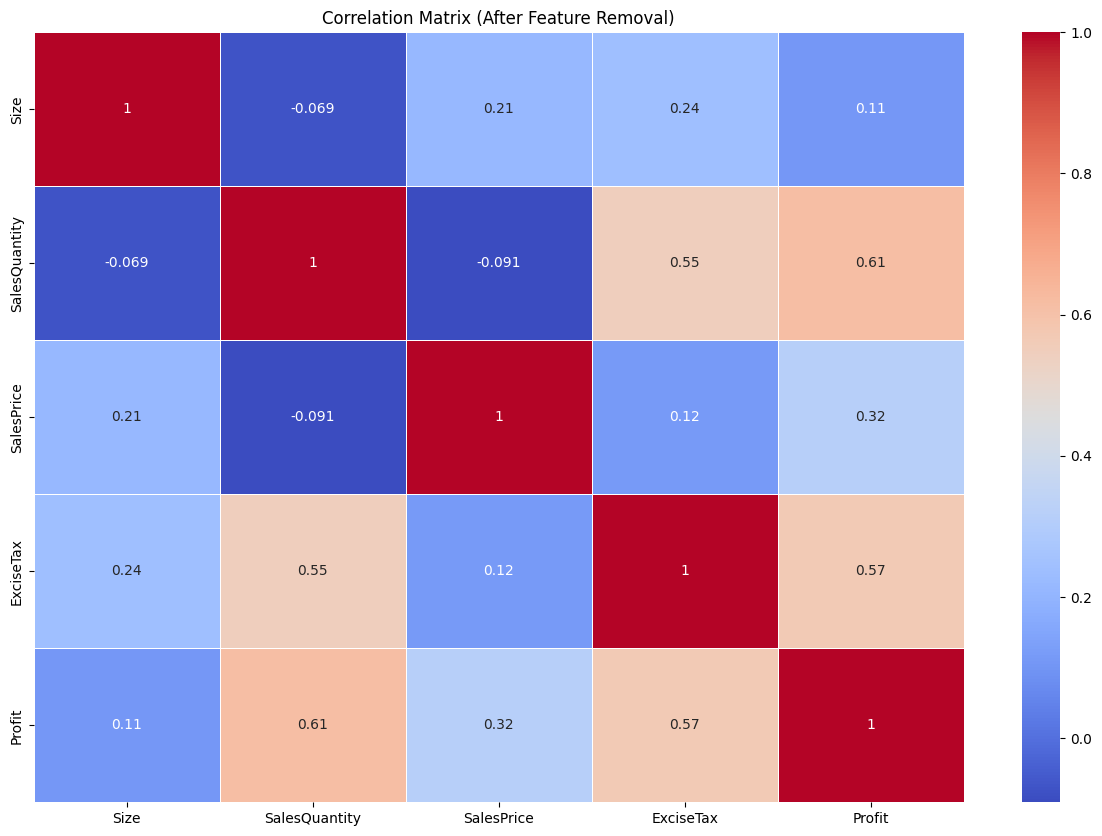

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Check for missing values
missing_values = sales_data.isnull().sum()
print("Missing values in dataset:\n", missing_values)

# Ensure relevant columns exist
required_columns = ['SalesQuantity', 'SalesPrice', 'SalesDate', 'ExciseTax', 'Size', 'Store', 'Classification']
missing_columns = [col for col in required_columns if col not in sales_data.columns]
if missing_columns:
    raise KeyError(f"The following required columns are missing from the dataset: {missing_columns}")

# Convert SalesDate to datetime with error handling
if 'SalesDate' in sales_data.columns:
    sales_data['SalesDate'] = pd.to_datetime(sales_data['SalesDate'], errors='coerce')

# Drop rows where SalesDate could not be converted (optional: you could also choose to fill them)
sales_data.dropna(subset=['SalesDate'], inplace=True)

# Correlation Analysis (only for numeric columns)
numeric_cols = sales_data.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

# Initial correlation heatmap before removing highly correlated features
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Before Feature Removal)')
plt.show()

# Remove highly correlated features (correlation > 0.8)
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

sales_data.drop(columns=correlated_features, inplace=True)

# Correlation Analysis After Removing Highly Correlated Features
numeric_cols_after_removal = sales_data.select_dtypes(include=[np.number])
corr_matrix_after_removal = numeric_cols_after_removal.corr()

# Visualizing correlation matrix after removing highly correlated features
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_after_removal, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (After Feature Removal)')
plt.show()

# Calculate Sales_Per_Day
sales_data['Sales_Per_Day'] = sales_data['SalesQuantity'] / (sales_data['SalesDate'].dt.dayofyear)

# Calculate Avg_Lead_Time
sales_data['Avg_Lead_Time'] = sales_data.groupby('Store')['SalesDate'].diff().dt.days
sales_data['Avg_Lead_Time'] = sales_data['Avg_Lead_Time'].fillna(sales_data['Avg_Lead_Time'].mean())

# Fill any remaining missing values after numeric conversions
sales_data.fillna(0, inplace=True)

# Split data into training (70%) and testing (30%)
train_data, test_data = train_test_split(sales_data, test_size=0.3, random_state=42)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your dataset loaded as 'sales_data'
# sales_data = pd.read_csv('your_dataset.csv')  # Uncomment this line and replace with your dataset

# Select only numeric columns
numeric_cols = sales_data.select_dtypes(include=[np.number])

# Create a figure with subplots for each numeric column
fig, axes = plt.subplots(nrows=len(numeric_cols.columns), ncols=1, figsize=(10, len(numeric_cols.columns) * 4))

# Iterate over each numeric column and plot its histogram
for i, col in enumerate(numeric_cols.columns):
    axes[i].hist(numeric_cols[col], bins=30, color='blue', alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


Cross-Validation Scores: [0.55659971 0.57088243 0.49537081 0.55203344 0.58392021]
Mean CV Score: 0.5517613210111149
OLS Regression Model: SalesQuantity = 4.68 + (-3.06 * Log_SalesPrice) + (1.83 * Log_ExciseTax) + (-0.47 * Log_Volume) + (3.46 * Log_Profit) + (-0.00 * Size)
Regression Evaluation:
R2: 0.5394732196502369, MSE: 5.725267023173826, MAE: 1.1146431548290239


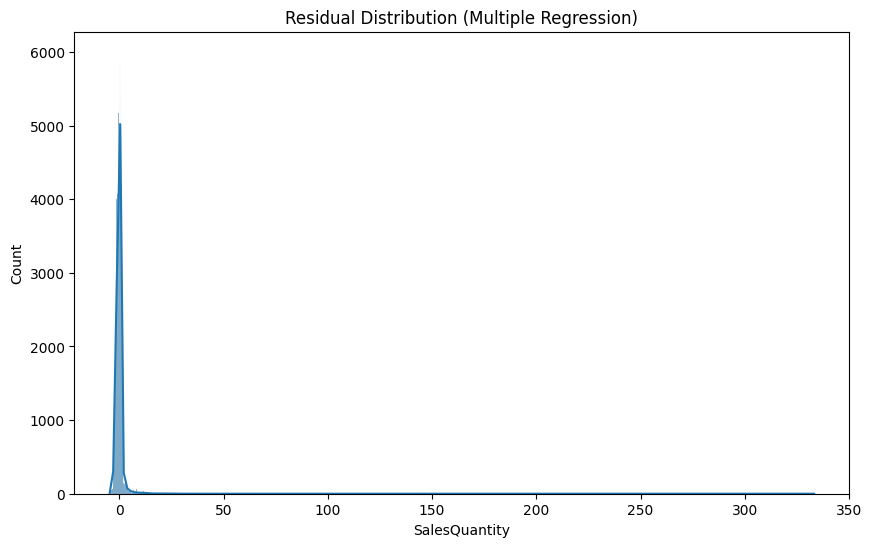

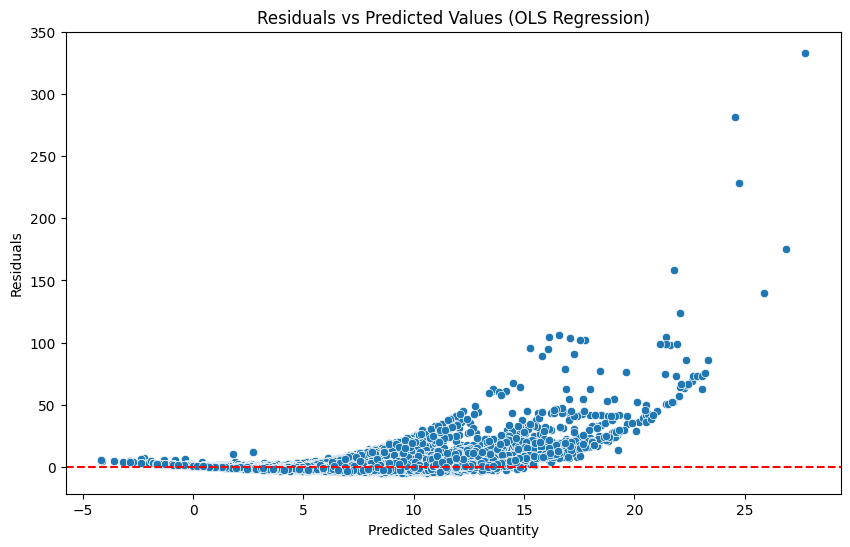

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Ensure all columns have numeric and positive values before applying log transformations
sales_data['SalesPrice'] = pd.to_numeric(sales_data['SalesPrice'], errors='coerce').fillna(1).clip(lower=1)
sales_data['ExciseTax'] = pd.to_numeric(sales_data['ExciseTax'], errors='coerce').fillna(1).clip(lower=1)
sales_data['Volume'] = pd.to_numeric(sales_data['Volume'], errors='coerce').fillna(1).clip(lower=1)
sales_data['Profit'] = pd.to_numeric(sales_data['Profit'], errors='coerce').fillna(1).clip(lower=1)

# Apply log transformations after handling invalid values
sales_data['Log_SalesPrice'] = np.log1p(sales_data['SalesPrice'])
sales_data['Log_ExciseTax'] = np.log1p(sales_data['ExciseTax'])
sales_data['Log_Volume'] = np.log1p(sales_data['Volume'])
sales_data['Log_Profit'] = np.log1p(sales_data['Profit'])

# Select features for the model based on correlation analysis and log transformation decisions
features = ['Log_SalesPrice', 'Log_ExciseTax', 'Log_Volume', 'Log_Profit', 'Size']  # Include Size for comparison

# Split the dataset into training and test sets
train_data, test_data = train_test_split(sales_data, test_size=0.3, random_state=42)

# Prepare features for training and testing
X_train_reg = train_data[features]
y_train_reg = train_data['SalesQuantity']  # Target variable

X_test_reg = test_data[features]
y_test_reg = test_data['SalesQuantity']  # Target variable

# Ensure all features are numeric
X_train_reg = X_train_reg.apply(pd.to_numeric, errors='coerce')
X_test_reg = X_test_reg.apply(pd.to_numeric, errors='coerce')

### Basic OLS Regression Model ###
ols_model = LinearRegression()

# Cross-Validation
cv_scores = cross_val_score(ols_model, X_train_reg, y_train_reg, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

# Fit the model
ols_model.fit(X_train_reg, y_train_reg)

# Make OLS predictions
y_pred_ols = ols_model.predict(X_test_reg)

# Output regression formula
intercept = ols_model.intercept_
coefficients = ols_model.coef_
formula_terms = [f"({coeff:.2f} * {feature})" for coeff, feature in zip(coefficients, X_train_reg.columns)]
formula = " + ".join(formula_terms)
full_formula = f"SalesQuantity = {intercept:.2f} + {formula}"
print(f"OLS Regression Model: {full_formula}")

# Evaluate OLS Regression
r2_ols = r2_score(y_test_reg, y_pred_ols)
mse_ols = mean_squared_error(y_test_reg, y_pred_ols)
mae_ols = mean_absolute_error(y_test_reg, y_pred_ols)
print(f'Regression Evaluation:')
print(f'R2: {r2_ols}, MSE: {mse_ols}, MAE: {mae_ols}')

# Residual Analysis
residuals_ols = y_test_reg - y_pred_ols
plt.figure(figsize=(10, 6))
sns.histplot(residuals_ols, kde=True)
plt.title('Residual Distribution (Multiple Regression)')
plt.show()

# Plot residuals against predicted values (OLS Regression)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_ols, y=residuals_ols)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (OLS Regression)')
plt.xlabel('Predicted Sales Quantity')
plt.ylabel('Residuals')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis for two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the residual distribution in the first subplot
ax[0].hist(residuals, bins=30, color='blue', alpha=0.7)
ax[0].set_title('Residual Distribution (Multiple Regression)')
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Count')

# Plot the residuals vs predicted values in the second subplot
ax[1].scatter(predicted_values, residuals, color='blue', alpha=0.6)
ax[1].axhline(0, color='red', linestyle='--')  # Add a horizontal line at 0
ax[1].set_title('Residuals vs Predicted Values (OLS Regression)')
ax[1].set_xlabel('Predicted Sales Quantity')
ax[1].set_ylabel('Residuals')

# Adjust layout to make room for titles and labels
plt.tight_layout()
plt.show()


In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   InventoryId     1048575 non-null  object        
 1   Store           1048575 non-null  object        
 2   Brand           1048575 non-null  object        
 3   Description     1048575 non-null  object        
 4   Size            1048575 non-null  float64       
 5   SalesQuantity   1048575 non-null  int64         
 6   SalesDollars    1048575 non-null  object        
 7   SalesPrice      1048575 non-null  float64       
 8   SalesDate       1048575 non-null  datetime64[ns]
 9   Volume          1048575 non-null  int64         
 10  Classification  1048575 non-null  object        
 11  ExciseTax       1048575 non-null  float64       
 12  VendorNo        1048575 non-null  object        
 13  VendorName      1048575 non-null  object        
 14  Amount          10

In [10]:
sales_data.head(10)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,Amount,Profit,MaxDailySales,Sales_Per_Day,Avg_Lead_Time,Log_SalesPrice,Log_ExciseTax,Log_Volume,Log_Profit
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,16.49,16.49,2016-01-01,750,1,1.00,12546,JIM BEAM BRANDS COMPANY,17.28,5.84,120,1.000000,0.001003,2.861629,0.693147,6.621406,1.922788
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,34.55,11.68,128,1.000000,1.000000,2.861629,0.943906,6.621406,2.540026
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,16.49,16.49,2016-01-03,750,1,1.00,12546,JIM BEAM BRANDS COMPANY,17.28,5.84,128,0.333333,1.000000,2.861629,0.693147,6.621406,1.922788
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,14.49,14.49,2016-01-08,750,1,1.00,12546,JIM BEAM BRANDS COMPANY,15.28,3.84,432,0.125000,5.000000,2.740195,0.693147,6.621406,1.576915
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,750.0,2,69.98,34.99,2016-01-09,375,1,1.00,12546,JIM BEAM BRANDS COMPANY,70.77,15.30,135,0.222222,1.000000,3.583241,0.693147,5.929589,2.791165
5,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,750.0,1,34.99,34.99,2016-01-15,375,1,1.00,12546,JIM BEAM BRANDS COMPANY,35.38,7.65,79,0.066667,6.000000,3.583241,0.693147,5.929589,2.157559
6,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,750.0,1,34.99,34.99,2016-01-22,375,1,1.00,12546,JIM BEAM BRANDS COMPANY,35.38,7.65,158,0.045455,7.000000,3.583241,0.693147,5.929589,2.157559
7,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,750.0,1,34.99,34.99,2016-01-30,375,1,1.00,12546,JIM BEAM BRANDS COMPANY,35.38,7.65,102,0.033333,8.000000,3.583241,0.693147,5.929589,2.157559
8,1_HARDERSFIELD_10058,1,10058,F Coppola Dmd Ivry Cab Svgn,750.0,4,59.96,14.99,2016-01-05,750,2,1.00,2000,SOUTHERN WINE & SPIRITS NE,60.41,22.92,55,0.800000,-25.000000,2.771964,0.693147,6.621406,3.174715
9,1_HARDERSFIELD_10058,1,10058,F Coppola Dmd Ivry Cab Svgn,750.0,1,14.99,14.99,2016-01-06,750,2,1.00,2000,SOUTHERN WINE & SPIRITS NE,15.1,5.73,108,0.166667,1.000000,2.771964,0.693147,6.621406,1.906575


Feature importances from Random Forest: {'Sales_Per_Day': 0.5706036390062289, 'Avg_Lead_Time': 0.08540204881617992, 'MaxDailySales': 0.34399431217759113}


<ipython-input-11-5ef3e1859e4d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Predicted_Stock_Level', y='Description', data=top_20_products, palette='viridis', order=top_20_products['Description'])


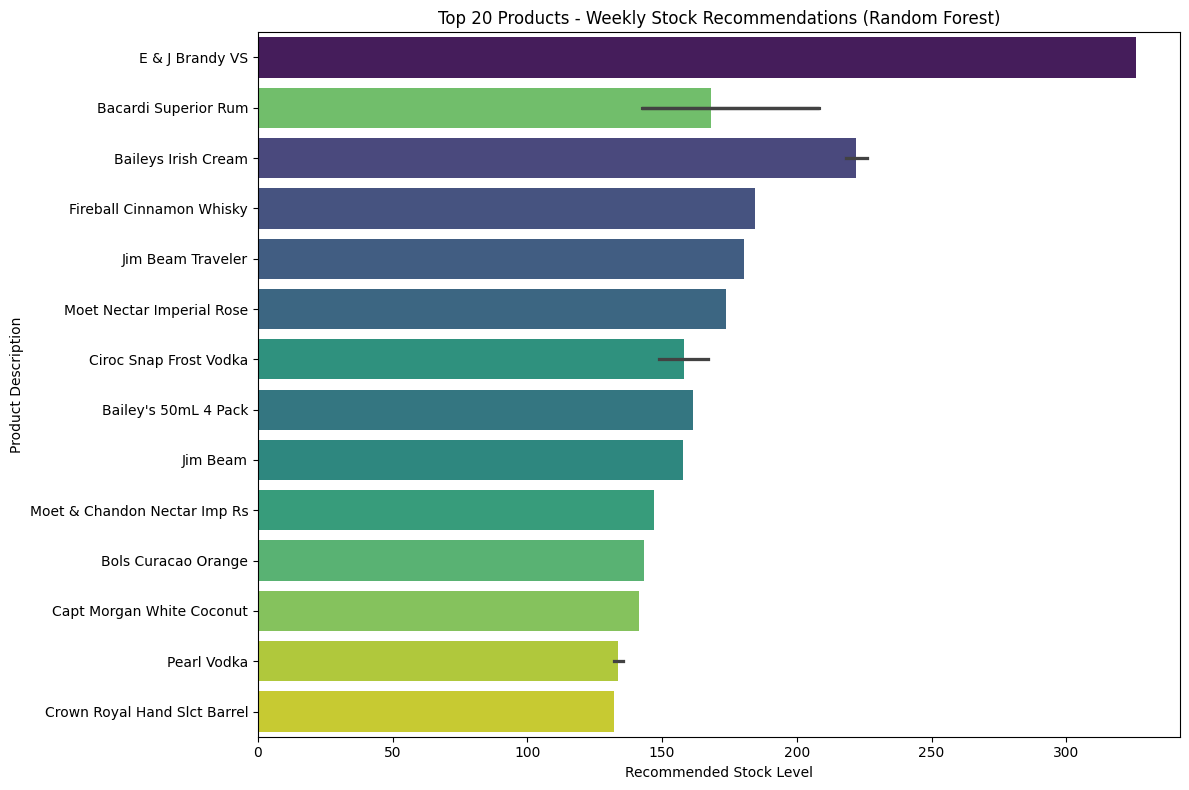

In [11]:
# Model 2: Random Forest for Top 20 Recommendation
X_train_rf = train_data[['Sales_Per_Day', 'Avg_Lead_Time', 'MaxDailySales']]
y_train_rf = train_data['SalesQuantity']

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Get feature importances
feature_importances = rf_model.feature_importances_
print("Feature importances from Random Forest:", dict(zip(X_train_rf.columns, feature_importances)))

# Predict stock levels and visualize top 20 recommended products
train_data['Predicted_Stock_Level'] = rf_model.predict(X_train_rf)
top_20_products = train_data.sort_values(by='Predicted_Stock_Level', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Predicted_Stock_Level', y='Description', data=top_20_products, palette='viridis', order=top_20_products['Description'])
plt.xlabel('Recommended Stock Level')
plt.ylabel('Product Description')
plt.title('Top 20 Products - Weekly Stock Recommendations (Random Forest)')
plt.tight_layout()
plt.show()

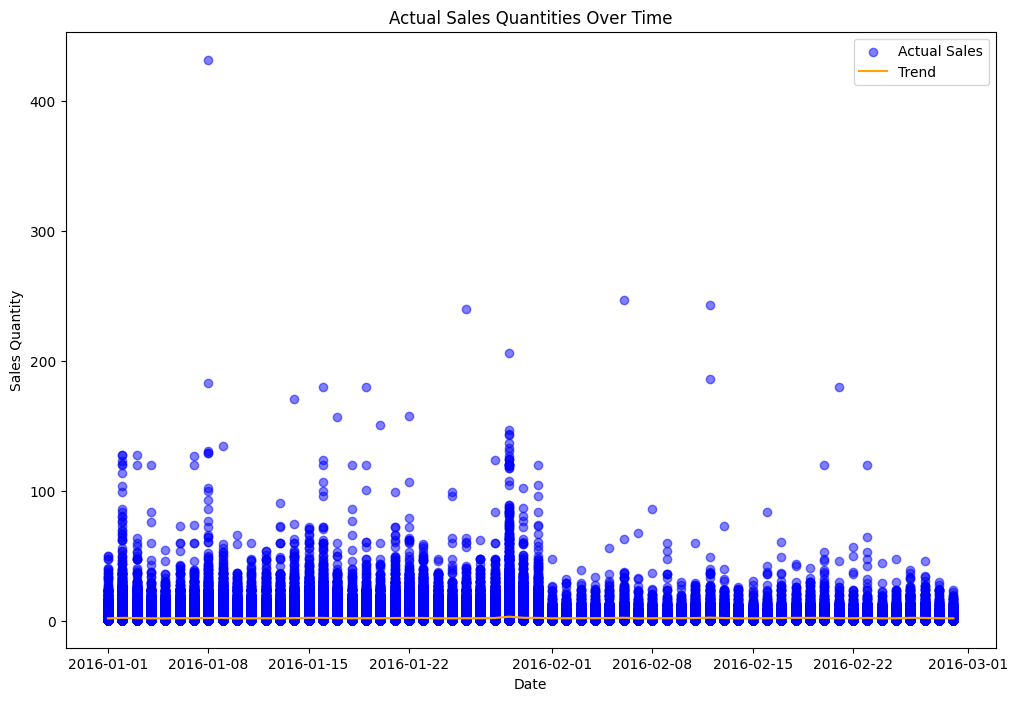

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptqcnipfd/52yuozrl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptqcnipfd/og_ifv9x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21328', 'data', 'file=/tmp/tmptqcnipfd/52yuozrl.json', 'init=/tmp/tmptqcnipfd/og_ifv9x.json', 'output', 'file=/tmp/tmptqcnipfd/prophet_modeln592cdqn/prophet_model-20241025202019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:20:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:24:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, 

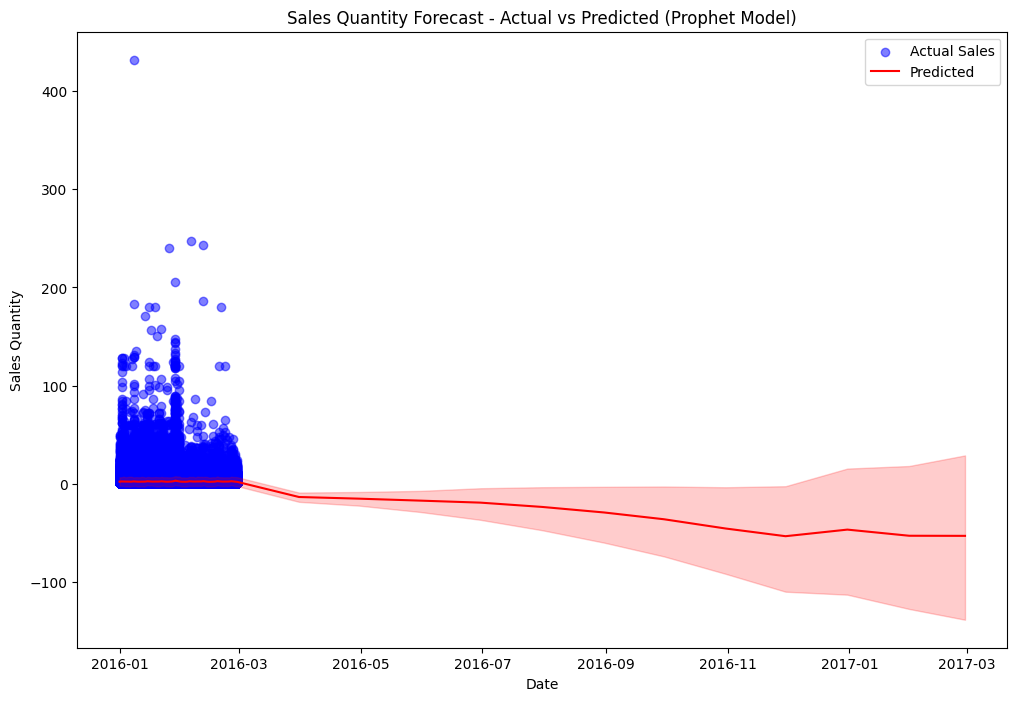

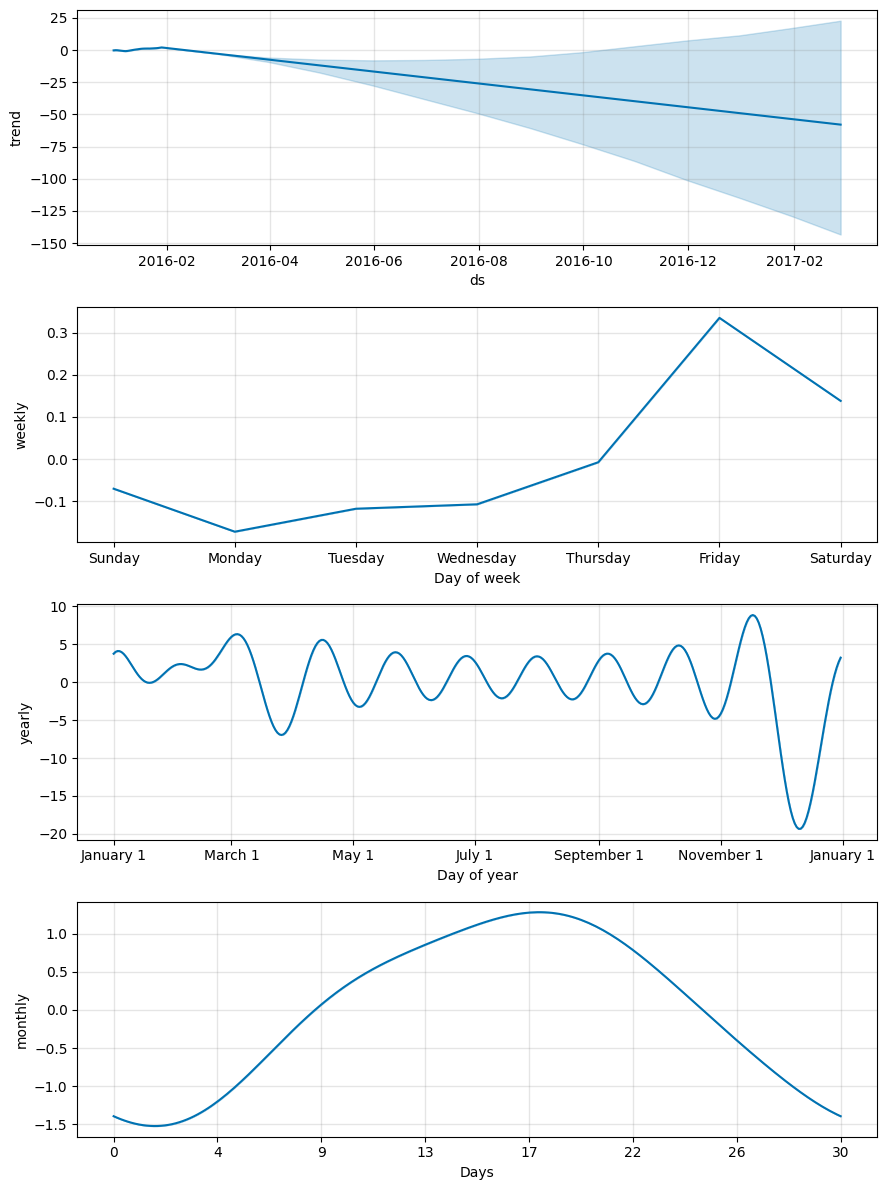

INFO:prophet:Making 6 forecasts with cutoffs between 2016-01-22 00:00:00 and 2016-02-26 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x798591112da0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmptqcnipfd/qdscie9l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptqcnipfd/61q8g22b.json


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns

# Prepare the Prophet data
prophet_data = train_data[['SalesDate', 'SalesQuantity']].rename(columns={'SalesDate': 'ds', 'SalesQuantity': 'y'})

# Visualize actual sales quantities over time
plt.figure(figsize=(12, 8))
plt.scatter(prophet_data['ds'], prophet_data['y'], label='Actual Sales', color='blue', alpha=0.5)
sns.lineplot(x=prophet_data['ds'], y=prophet_data['y'], label='Trend', color='orange')
plt.title('Actual Sales Quantities Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.show()

# Define and fit the Prophet model with optimized seasonality
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=3)  # Lowered fourier_order for monthly seasonality
prophet_model.fit(prophet_data)

# Create a future DataFrame to forecast sales for the next 12 months
future = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast = prophet_model.predict(future)

# Plot forecast against actual sales
plt.figure(figsize=(12, 8))
plt.scatter(prophet_data['ds'], prophet_data['y'], label='Actual Sales', color='blue', alpha=0.5)
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)
plt.title('Sales Quantity Forecast - Actual vs Predicted (Prophet Model)')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.show()

# Plot trend, weekly, and monthly components of the forecast
prophet_model.plot_components(forecast)
plt.show()

# Cross-validation for Prophet model: forecast on historical data and calculate R², MSE, and MAE
# Increase the initial training period to help the model capture patterns
df_cv = cross_validation(prophet_model, initial='15 days', period='7 days', horizon='3 days', parallel="processes")
df_performance = performance_metrics(df_cv)

# Calculate R², MSE, and MAE based on cross-validation predictions
y_true = df_cv['y'].values  # Actual sales quantities from cross-validation
y_pred = df_cv['yhat'].values  # Predicted sales quantities from cross-validation

r2_prophet = r2_score(y_true, y_pred)
mse_prophet = mean_squared_error(y_true, y_pred)
mae_prophet = mean_absolute_error(y_true, y_pred)

# Print evaluation metrics for Prophet
print("Prophet Model Evaluation Metrics:")
print(f"R²: {r2_prophet}")
print(f"MSE: {mse_prophet}")
print(f"MAE: {mae_prophet}")

# Display full performance metrics from Prophet cross-validation
print("\nProphet Model Performance Metrics from Cross-Validation:")
print(df_performance)

# Plot cross-validation metrics for MAE and MSE
fig = plot_cross_validation_metric(df_cv, metric='mae')
plt.show()

fig = plot_cross_validation_metric(df_cv, metric='mse')
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
from prophet.diagnostics import cross_validation, performance_metrics

# Define y_true and y_predict for Multiple Regression Model
y_test_reg = test_data['SalesQuantity']  # Actual values for Multiple Regression
y_pred_ols = ols_model.predict(X_test_reg)  # Predicted values from the Multiple Regression model

# Define y_true and y_predict for Random Forest Model
X_test_rf = test_data[['Sales_Per_Day', 'Avg_Lead_Time', 'MaxDailySales']]
y_test_rf = test_data['SalesQuantity']  # Actual values for Random Forest
y_pred_rf = rf_model.predict(X_test_rf)  # Predicted values from Random Forest model

# Prophet Model Evaluation using cross-validation
# Define the Prophet model without seasonality
df_cv = cross_validation(prophet_model, initial='15 days', period='7 days', horizon='3 days', parallel="processes")
# # Short horizon to fit within dataset limits
#  Re-fit model every 7 days
# Minimum possible initial period for limited data
df_performance = performance_metrics(df_cv)

# Extract y_true and y_predict for Prophet Model
y_true_prophet = df_cv['y']  # Actual sales quantities from cross-validation
y_pred_prophet = df_cv['yhat']  # Predicted sales quantities from cross-validation

# Calculate Prophet metrics (MSE, MAE) based on cross-validation results
r2_prophet = r2_score(y_true_prophet, y_pred_prophet)
mse_prophet = mean_squared_error(y_true_prophet, y_pred_prophet)
mae_prophet = mean_absolute_error(y_true_prophet, y_pred_prophet)

# Calculate evaluation metrics for Multiple Regression Model
r2_ols = r2_score(y_test_reg, y_pred_ols)
mse_ols = mean_squared_error(y_test_reg, y_pred_ols)
mae_ols = mean_absolute_error(y_test_reg, y_pred_ols)

# Calculate evaluation metrics for Random Forest Model
r2_rf = r2_score(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)

# Compile all metrics into a DataFrame for easy comparison
evaluation_metrics = pd.DataFrame({
    'Model': ['Multiple Regression', 'Random Forest', 'Prophet Time Series'],
    'R-squared (R2)': [r2_ols, r2_rf, r2_prophet],
    'Mean Squared Error (MSE)': [mse_ols, mse_rf, mse_prophet],
    'Mean Absolute Error (MAE)': [mae_ols, mae_rf, mae_prophet]
})

print("Model Evaluation Metrics:")
print(evaluation_metrics)
